<a href="https://colab.research.google.com/github/invest41/Computer-Vision-in-Medicine/blob/main/Update_of_Chest_X_Ray_(Pneumonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classifying Lung Opacities using Artificial Neural Networks in Deep Learning**

This Notebook contains the algorithmic process involved in data analytics using classic neural networks in predicting a lung condition.

It involves:
- Data processing, cleaning, wrangling, analysis and visualizations


- Building a working Machine Learning model with competent predictive capabilities


- Using proper computational algorithms and visualizations to derive insights from real radiological Data


- Involves an interactive session where we assess our Model's performance simultaneously with that of a human ( i.e. Given a patient's Chest X-ray, we'd make our model, the predictor, and a human volunteer, choose if the individual is likely to have pneumonia or not )


In [1]:
!pip install kaggle

In [2]:
#Set up environment
import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns
import tensorflow as tf, keras as krs
 
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score as acsc, precision_recall_fscore_support as PRFS,classification_report,confusion_matrix
 
import cv2, warnings
warnings.simplefilter("ignore")

In [3]:
import os, time

#Importing Dataset from kaggle
os.environ['KAGGLE_USERNAME'] = "Generate your kaggle API"
os.environ['KAGGLE_KEY'] = "Generate your kaggle API"

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 60.5MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.4MB/s]


In [4]:
#Extraction process
#1.0
from zipfile import ZipFile

#2.0
file_name = "./chest-xray-pneumonia.zip"

#3.0
with ZipFile(file_name, 'r') as zip: 
  #zip.printdir()
  lst = zip.namelist()
  
  #3.1
  print('Extracting all the files now...') 
  tick = time.time()
  zip.extractall('temp')
  tock = time.time()
  print(f'Done!\n{round((tock-tick),2)} seconds...')

Extracting all the files now...
Done!
61.54 seconds...


In [5]:
co = 0
print("Preparing the images...")
tickk = time.time()
for img in lst:
  co+=1
  #with open(f"/content/temp/{img}", "rb") as wow: file = wow.read()
  #with open(f"img_{co}.","wb") as im: im.write(file)
tockk = time.time()
print(f"Done!\n{round((tockk-tickk)*1000,2)} ms")


Preparing the images...
Done!
2.02 ms


In [6]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 180

def get_image_arr(data_dir):
    data = list() 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data

train_path = "./temp/chest_xray/train"
val_path = "./temp/chest_xray/val"
test_path = "./temp/chest_xray/test"
pathh = "./temp/chest_xray"

In [7]:
tic = time.time()
train_fnames = get_image_arr(train_path)
val_fnames = get_image_arr(val_path)
test_fnames = get_image_arr(test_path)

#all_files = get_image_files(pathh)

toc = time.time()

print(f"Time taken - {round((toc-tic),2)} seconds...")

Time taken - 46.45 seconds...


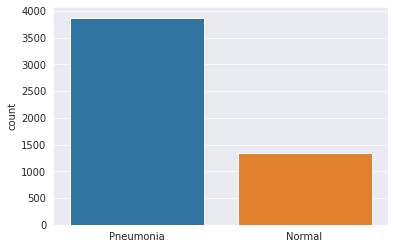

5216 training images


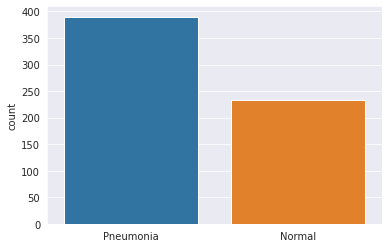

624 testing images


In [45]:
# Dataset plot
lst,co,fl = [],0,[train_fnames,test_fnames]
for ar in fl:  
  for i in ar:
    if i[1] == 0: lst.append("Pneumonia")
    else: lst.append("Normal")
  sns.set_style('darkgrid')
  sns.countplot(lst)
  plt.show()
  print(len(lst),end='')
  if co==0: print(" training images")
  else: print(' testing images')
  lst=[]
  co+=1

In [9]:
color_lst = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet','jet_r','magma']

># **Radiographic preview**



Text(0.5, 1.0, 'NORMAL')

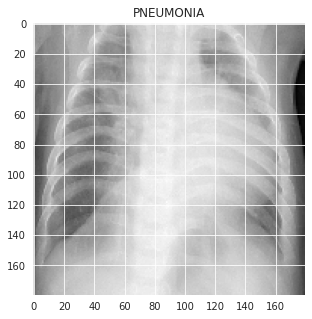

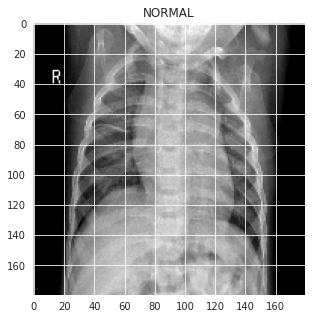

In [50]:

train = np.asarray(train_fnames)

feature = np.array([f for f,l in train_fnames])
label = np.array([l for f,l in train_fnames])

feature1 = np.array([ft for ft,ll in test_fnames])
label1 = np.array([ll for ft,ll in test_fnames])

plt.figure(figsize = (5, 5))
plt.imshow(train[1][0], cmap='gray') #inferno, gist_heat 
plt.title(labels[train[8][1]])

plt.figure(figsize = (5, 5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-3][1]])

># **Convolutional Neural Network**

In [58]:
X1 = feature/255.0
X1 = X1.reshape(5216,180,180,1)
y1 = label

X2 = feature1/255.0
X2 = X2.reshape(624,180,180,1)
y2 = label1

acc_thresh = 0.998

#Creating a custom callback class
class myCallback(krs.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>acc_thresh):
      print('\nCustom accuracy threashold reached, cancelling training...')
      self.model.stop_training = True

callbacks = myCallback()
tick = time.time()
model = tf.keras.models.Sequential([
                                    krs.layers.Conv2D(64,(3,3),activation='relu'),
                                    krs.layers.MaxPooling2D(2,2),
                                    krs.layers.Conv2D(64,(3,3),activation='relu'),
                                    krs.layers.MaxPooling2D(2,2),
                                    krs.layers.Flatten(),
                                    krs.layers.Dense(512, activation=tf.nn.relu),
                                    krs.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
optimize = krs. optimizers.Adam(decay=1e-3)
model.compile(
    optimizer=optimize,
    loss = "binary_crossentropy",
    metrics=["accuracy"])



history = model.fit(X1,y1, epochs=20, callbacks=[callbacks])
tock = time.time()

Epoch 1/20
163/163 [==============================] - 9s 52ms/step - loss: 0.4350 - accuracy: 0.8042
Epoch 2/20
163/163 [==============================] - 9s 52ms/step - loss: 0.0945 - accuracy: 0.9680
Epoch 3/20
163/163 [==============================] - 9s 53ms/step - loss: 0.0608 - accuracy: 0.9816
Epoch 4/20
163/163 [==============================] - 9s 53ms/step - loss: 0.0458 - accuracy: 0.9869
Epoch 5/20
163/163 [==============================] - 8s 52ms/step - loss: 0.0251 - accuracy: 0.9898
Epoch 6/20
163/163 [==============================] - 8s 52ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 7/20
163/163 [==============================] - 8s 52ms/step - loss: 0.0138 - accuracy: 0.9971
Epoch 8/20
163/163 [==============================] - 8s 52ms/step - loss: 0.0015 - accuracy: 0.9999

Custom accuracy threashold reached, cancelling training...


Deep learning model:

Time taken - 69.0s
Accuracy - 78.21%, Probability threshold - 2.4931646969150734e-08
Precision - 65.71%
Sensitivity - 87.61%
Specificity - 72.56%
F1 score - 75.09%

20/20 [==============================] - 0s 17ms/step - loss: 3.0728 - accuracy: 0.7212


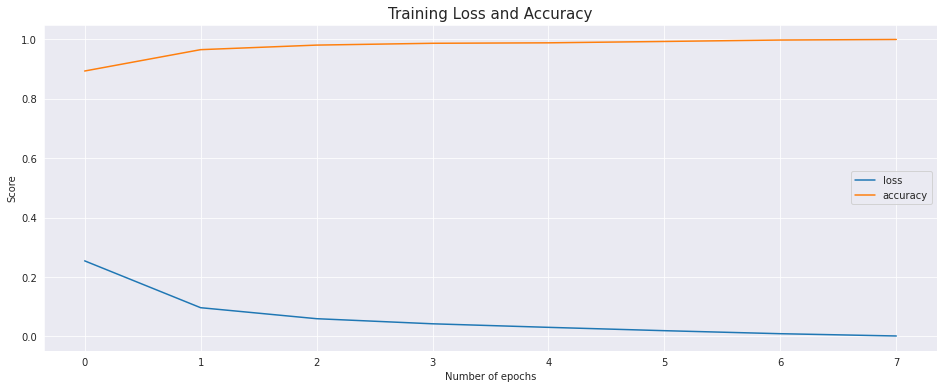

In [59]:
def per(f): return str(round((f*100),2))+"%" 

pred_prob = model.predict(X2)
threshold = np.percentile(pred_prob,50)
 
pred_prob[(pred_prob)>threshold], pred_prob[(pred_prob)<=threshold] = 1, 0
 
score = round(acsc(y2,pred_prob)*100,2)
print(f"Deep learning model:\n\nTime taken - {round(tock-tick,2)}s\nAccuracy - {score}%, Probability threshold - {threshold}")
 
 
prd,rd,fd,sd = PRFS(y2,pred_prob)
print(f"Precision - {per(prd[1])}\nSensitivity - {per(rd[1])}\nSpecificity - {per(rd[0])}")
print(f"F1 score - {per(fd[1])}\n")
 
model.evaluate(X2,y2)
 
hist_metrics = pd.DataFrame(history.history)
hist_metrics.plot(figsize=(16,6))
plt.title("Training Loss and Accuracy", fontsize = 15)
plt.xlabel("Number of epochs"),plt.ylabel("Score")
plt.legend(loc=7)

In [30]:
# serialize model to JSON
model_json = model.to_json()
fn = "deep_learning_xray_model.json"
with open(fn, "w") as json_file:
    json_file.write(model_json)

# Saving weights of the model to a HDF5 file 
mw = "deep_learning_xray_model_weight.h5"
cm = "chest_xray_dmodel.h5"
model.save_weights(mw)
model.save(cm)

print(f"Deep Learning model stored in: {fn}\nModel Weight stored in: {mw}",end='\n\n')
print(f"Core Model saved to: {cm}")

Deep Learning model stored in: deep_learning_xray_model.json
Model Weight stored in: deep_learning_xray_model_weight.h5

Core Model saved to: chest_xray_dmodel.h5


># **Practical predictive assessment**


   QUESTION 1



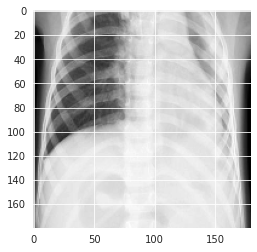

<Figure size 1008x1008 with 0 Axes>

Is this Pneumonia? Yes
Predictor agrees...

Correct Answer: Pneumonia



   QUESTION 2



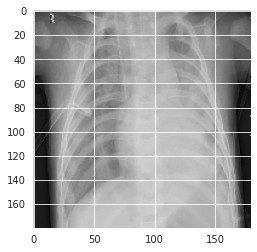

<Figure size 1008x1008 with 0 Axes>

Is this Pneumonia? Yes
Predictor agrees...

Correct Answer: Pneumonia



   QUESTION 3



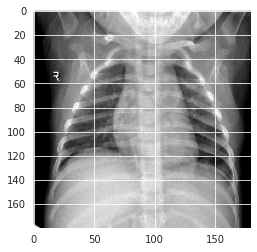

<Figure size 1008x1008 with 0 Axes>

Is this Pneumonia? No
Predictor agrees...

Correct Answer: Normal



   QUESTION 4



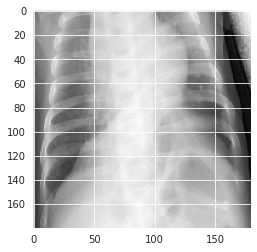

<Figure size 1008x1008 with 0 Axes>

Is this Pneumonia? Yes
Predictor agrees...

Correct Answer: Pneumonia



   QUESTION 5



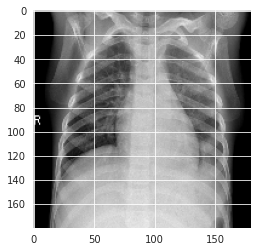

<Figure size 1008x1008 with 0 Axes>

Is this Pneumonia? No
Predictor disagrees...

Correct Answer: Pneumonia


End of Quiz...


In [27]:
def answer(inp,fetr):
  pred_prob1 = model.predict(np.array([fetr]).reshape(1,180,180,1))
  thresh = 0.5
  pred_prob1[(pred_prob1)>thresh], pred_prob1[(pred_prob1)<=thresh] = 1, 0
  ans = pred_prob1[0][0]
  if (inp.startswith("y") and ans==0) or (inp.startswith('n') and ans==1):
    print("Predictor agrees...")
  else: print("Predictor disagrees...")



co, qn, fun = 0, 5, []
for fl in np.random.randint(0,len(train)-1,qn):
  co+=1
  print(f"\n   QUESTION {co}\n")
  ftr = (train[fl][0])/255.0
  fun.append(ftr)
  plt.imshow(ftr, cmap="gray")
  plt.figure(figsize=(14,14))
  plt.show()
  answer(input("Is this Pneumonia? ").strip().lower(),ftr)
  if train[fl][1]==0: print("\nCorrect Answer: Pneumonia",end="\n\n\n")
  else: print("\nCorrect Answer: Normal",end="\n\n\n")
  
print("End of Quiz...")